In [8]:
import cv2
import matplotlib.pyplot as plt
import skimage


In [10]:
img1 = cv2.imread('new.jpg')
img1.shape


(800, 1200, 3)

In [12]:

sift_d = cv2.SIFT_create() #scale invarient feature transform
orb_d = cv2.ORB_create()  #Oriented fast and Rotated Brief
surf_d = cv2.xfeatures2d.SURF()  #Speed up robust Features

In [14]:
kp1, des1 = sift_d.detectAndCompute(img1,None)  #keypoints, Descriptors
len(kp1)

511

In [25]:
img2 = cv2.imread("robo.png")
kp2, des2 = sift_d.detectAndCompute(img2,None)  #keypoints, Descriptors
len(kp2)

1085

In [18]:
kp10 =  kp1[1]
kp10.size

2.442584991455078

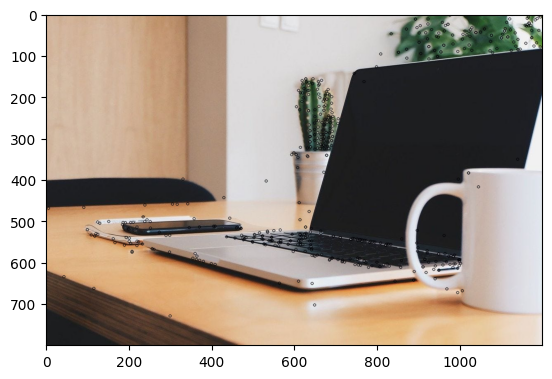

In [20]:
img1_kp = cv2.drawKeypoints(
    img1, kp1, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.imshow(img1_kp[:,:,::-1])

In [21]:
len(kp1)

511

In [22]:
des1.shape

(1085, 128)

In [23]:
matcher = cv2.BFMatcher()

In [27]:
matches = matcher.knnMatch(des1,des2, k=2)
len(matches)

1085

In [31]:
count = 0
th = 20
for m1,m2 in matches:
    gap = abs(m1.distance - m2.distance)
    if gap<th:
        count += 1

print(count, len(matches))

0 1085
